### SBA Loan Project 

#### Josahn Oginga 

In [29]:
#import libraries 
import pandas as pd
import numpy as np 

In [30]:
#load the data 
df = pd.read_csv(r"C:\Users\Ochieng' Oginga\Documents\Post_S\Spring_2025\Data_Science_II\Project\Data\Oginga_Stage1.csv")
#show head 
df.head()

C:\Users\Ochieng' Oginga\AppData\Local\Temp\ipykernel_41608\2981810954.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Ochieng' Oginga\Documents\Post_S\Spring_2025\Data_Science_II\Project\Data\Oginga_Stage1.csv")


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


#### Preprocessing 

1. Handle Missing Values 

In [41]:
# Check if there are any missing values in the entire DataFrame
any_missing = df.isnull().values.any()

print("Any missing values in the DataFrame:", any_missing)


Any missing values in the DataFrame: True


Calculate the percentage of missing values per column to identify columns that need to be imputed or if the missing values are too low and won’t reduce the data’s richness and complexity. 

In [43]:
# Calculate the percentage of missing values per column
missing_percentage = (df.isnull().mean()) * 100

# Print the percentage of missing values
print(missing_percentage)


LoanNr_ChkDgt         0.000000
Name                  0.001557
City                  0.003336
State                 0.001557
Zip                   0.000000
Bank                  0.173383
BankState             0.174162
NAICS                 0.000000
ApprovalDate          0.000000
ApprovalFY            0.000000
Term                  0.000000
NoEmp                 0.000000
NewExist              0.015125
CreateJob             0.000000
RetainedJob           0.000000
FranchiseCode         0.000000
UrbanRural            0.000000
RevLineCr             0.503579
LowDoc                0.287156
ChgOffDate           81.905526
DisbursementDate      0.263356
DisbursementGross     0.000000
BalanceGross          0.000000
MIS_Status            0.222095
ChgOffPrinGr          0.000000
GrAppv                0.000000
SBA_Appv              0.000000
dtype: float64


Drop rows that have missing values on key variables that cannot be imputed. In this case, empty rows in these columns were dropped: Name, City, State, DisbursementDate, NewExist, Bank, BankState and MIS status. 

Since this is a large dataset and the variables are non-numeric, it is challenging to impute with a mean or median. 

In [54]:
# Drop rows where the 'Name',  "City", "State", "DisbursementDate", "MIS_Status" column has missing values (NaN)
df_clean = df.dropna(subset=['Name', "City", "State", "DisbursementDate", "MIS_Status", "NewExist", "BankState", "Bank"])

# Check new percentage of missing values per column
missing_percentage = (df_clean.isnull().mean()) * 100

# Print the percentage of missing values
print(missing_percentage)


LoanNr_ChkDgt         0.000000
Name                  0.000000
City                  0.000000
State                 0.000000
Zip                   0.000000
Bank                  0.000000
BankState             0.000000
NAICS                 0.000000
ApprovalDate          0.000000
ApprovalFY            0.000000
Term                  0.000000
NoEmp                 0.000000
NewExist              0.000000
CreateJob             0.000000
RetainedJob           0.000000
FranchiseCode         0.000000
UrbanRural            0.000000
RevLineCr             0.504762
LowDoc                0.284677
ChgOffDate           81.863937
DisbursementDate      0.000000
DisbursementGross     0.000000
BalanceGross          0.000000
MIS_Status            0.000000
ChgOffPrinGr          0.000000
GrAppv                0.000000
SBA_Appv              0.000000
dtype: float64


2. Binary Ecoding 

Convert charge off date from a date into a binary to handle the missing values: 0 – if there is no date, and 1 if there is a date, and store in ChgOffDate_binary column. 

In [55]:
#for charge off date 
# Use .loc to modify the original DataFrame and ensure you're creating the binary column
df_clean.loc[:, 'ChgOffDate_binary'] = df_clean['ChgOffDate'].notna().astype(int)

# Print the DataFrame to check the new column
print(df_clean[['ChgOffDate', 'ChgOffDate_binary']])


       ChgOffDate  ChgOffDate_binary
0             NaN                  0
1             NaN                  0
2             NaN                  0
3             NaN                  0
4             NaN                  0
...           ...                ...
899159        NaN                  0
899160        NaN                  0
899161        NaN                  0
899162   8-Mar-00                  1
899163        NaN                  0

[893292 rows x 2 columns]


C:\Users\Ochieng' Oginga\AppData\Local\Temp\ipykernel_41608\3815530800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'ChgOffDate_binary'] = df_clean['ChgOffDate'].notna().astype(int)


In [56]:
#check shape of data
df_clean.shape

(893292, 28)

Remove undefined location in UrbanRural column, and using the new information, create UrbanRural_binary column, assign 0 to urban and 1 to rural. 

In [57]:
#first check how many datapoints are undefuined 
#Calculate the percentage of '0' (undefined) in the 'UrbanRural' column
undefined_percentage = (df_clean['UrbanRural'] == 0).mean() * 100

# Print the result
print(f"Percentage of undefined values in 'UrbanRural': {undefined_percentage:.2f}%")

# Drop rows where 'UrbanRural' is 0
df_clean = df_clean.drop(df_clean[df_clean['UrbanRural'] == 0].index)


Percentage of undefined values in 'UrbanRural': 35.93%


In [58]:
#create a binary column for UrbanRural for just urban and rural entries and create the 'UrbanRural_binary' column
df_clean.loc[:, 'UrbanRural_binary'] = df_clean['UrbanRural'].apply(lambda x: 0 if x == 1 else (1 if x == 2 else None))

# Print the DataFrame to check the new column
print(df_clean[['UrbanRural', 'UrbanRural_binary']].head(20))


     UrbanRural  UrbanRural_binary
12            1                  0
24            1                  0
28            1                  0
30            1                  0
32            1                  0
34            2                  1
38            1                  0
49            1                  0
58            1                  0
62            1                  0
65            1                  0
67            2                  1
71            1                  0
76            2                  1
77            1                  0
80            1                  0
83            1                  0
89            2                  1
123           1                  0
127           2                  1


In [59]:
df_clean.shape

(572333, 29)

3. Drop off non-key variables

Drop off columns that are not part of the key variables: 'LoanNr_ChkDgt', 'ChgOffDate','UrbanRural', 'RevLineCr', 'LowDoc', 'BalanceGross'

In [60]:
# Drop the specified columns from the DataFrame
df_clean = df_clean.drop(columns=['LoanNr_ChkDgt', 'ChgOffDate','UrbanRural', 'RevLineCr', 'LowDoc', 'BalanceGross'])

# Print the DataFrame to check the result
print(df_clean.head())

                           Name         City State    Zip  \
12                       CARVEL         APEX    NC  27502   
24                       SUBWAY  LITTLE ROCK    AR  72223   
28          WEYLAND CORPORATION    CAMARILLO    CA  93010   
30  CHICAGO BRICK UNLIMITED INC        MIAMI    FL  33186   
32                    RZI, INC.  NEW ORLEANS    LA  70130   

                              Bank BankState   NAICS ApprovalDate ApprovalFY  \
12           STEARNS BK NATL ASSOC        MN  445299     7-Feb-06       2006   
24                        HOPE FCU        MS  722211     7-Feb-06       2006   
28     WELLS FARGO BANK NATL ASSOC        SD  611110     7-Feb-06       2006   
30                  CITIBANK, N.A.        FL  238140     7-Feb-06       2006   
32  BUSINESS RES. CAP. SPECIALTY B        LA  532490     7-Feb-06       2006   

    Term  ...  RetainedJob  FranchiseCode  DisbursementDate  \
12   162  ...            0          15100         31-Mar-06   
24   126  ...            0

In [61]:
#see the final pre-processed dataset
df_clean.shape

(572333, 23)

4. Convert monetary values into numeric values  

In [78]:
# List of monetary columns
dollar_columns = ['DisbursementGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']

# Remove $ and , then convert to float
df_clean[dollar_columns] = df_clean[dollar_columns].replace('[\$,]', '', regex=True).astype(float)


### Descriptives 

i. Numeric descriptive statistics

In [62]:
#get description of the data 
df_clean.describe(include='all')


,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,...,RetainedJob,FranchiseCode,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,ChgOffDate_binary,UrbanRural_binary
count,572333,572333,572333,572333.000000,572333,572333,572333.000000,572333,572333.0,572333.000000,...,572333.000000,572333.000000,572333,572333,572333,572333,572333,572333,572333.000000,572333.000000
unique,503960,26389,51,NaN,4599,55,NaN,4907,25.0,NaN,...,NaN,NaN,2851,107119,2,70840,13359,19659,NaN,NaN
top,SUBWAY,LOS ANGELES,CA,NaN,BANK OF AMERICA NATL ASSOC,CA,NaN,30-Jan-04,2006.0,NaN,...,NaN,NaN,31-Mar-06,"$50,000.00",P I F,$0.00,"$50,000.00","$25,000.00",NaN,NaN
freq,937,8412,82707,NaN,68797,78333,NaN,981,75455.0,NaN,...,NaN,NaN,6938,29185,437927,433946,53892,46999,NaN,NaN
mean,NaN,NaN,NaN,52526.476848,NaN,NaN,498976.917606,NaN,NaN,96.625847,...,5.958591,2718.594684,NaN,NaN,NaN,NaN,NaN,NaN,0.241809,0.183114
std,NaN,NaN,NaN,31533.588428,NaN,NaN,195553.671067,NaN,NaN,70.744067,...,24.015743,12730.193422,NaN,NaN,NaN,NaN,NaN,NaN,0.428179,0.386760
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,22480.000000,NaN,NaN,423210.000000,NaN,NaN,60.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,54112.000000,NaN,NaN,511199.000000,NaN,NaN,84.000000,...,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
75%,NaN,NaN,NaN,83713.000000,NaN,NaN,621340.000000,NaN,NaN,102.000000,...,6.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000


Summary of numeric variables 

In [64]:
#get summary of the numeric variables 
df_clean.describe()

,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,ChgOffDate_binary,UrbanRural_binary
count,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000
mean,52526.476848,498976.917606,96.625847,8.801560,1.285879,2.424426,5.958591,2718.594684,0.241809,0.183114
std,31533.588428,195553.671067,70.744067,43.751445,0.453835,13.775755,24.015743,12730.193422,0.428179,0.386760
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22480.000000,423210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54112.000000,511199.000000,84.000000,4.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000
75%,83713.000000,621340.000000,102.000000,8.000000,2.000000,2.000000,6.000000,1.000000,0.000000,0.000000
max,99999.000000,928120.000000,569.000000,8000.000000,2.000000,5085.000000,9500.000000,92006.000000,1.000000,1.000000


Summary for categorical variables 

In [65]:
#summary of categorical variables 
df_clean.describe(include=[object])


,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
count,572333,572333,572333,572333,572333,572333,572333,572333,572333,572333,572333,572333,572333
unique,503960,26389,51,4599,55,4907,25,2851,107119,2,70840,13359,19659
top,SUBWAY,LOS ANGELES,CA,BANK OF AMERICA NATL ASSOC,CA,30-Jan-04,2006,31-Mar-06,"$50,000.00",P I F,$0.00,"$50,000.00","$25,000.00"
freq,937,8412,82707,68797,78333,981,75455,6938,29185,437927,433946,53892,46999


ii. Graphical descriptions

a) Histogram for numeric values 


array([[<Axes: title={'center': 'Zip'}>,
        <Axes: title={'center': 'NAICS'}>,
        <Axes: title={'center': 'Term'}>],
       [<Axes: title={'center': 'NoEmp'}>,
        <Axes: title={'center': 'NewExist'}>,
        <Axes: title={'center': 'CreateJob'}>],
       [<Axes: title={'center': 'RetainedJob'}>,
        <Axes: title={'center': 'FranchiseCode'}>,
        <Axes: title={'center': 'ChgOffDate_binary'}>],
       [<Axes: title={'center': 'UrbanRural_binary'}>, <Axes: >,
        <Axes: >]], dtype=object)

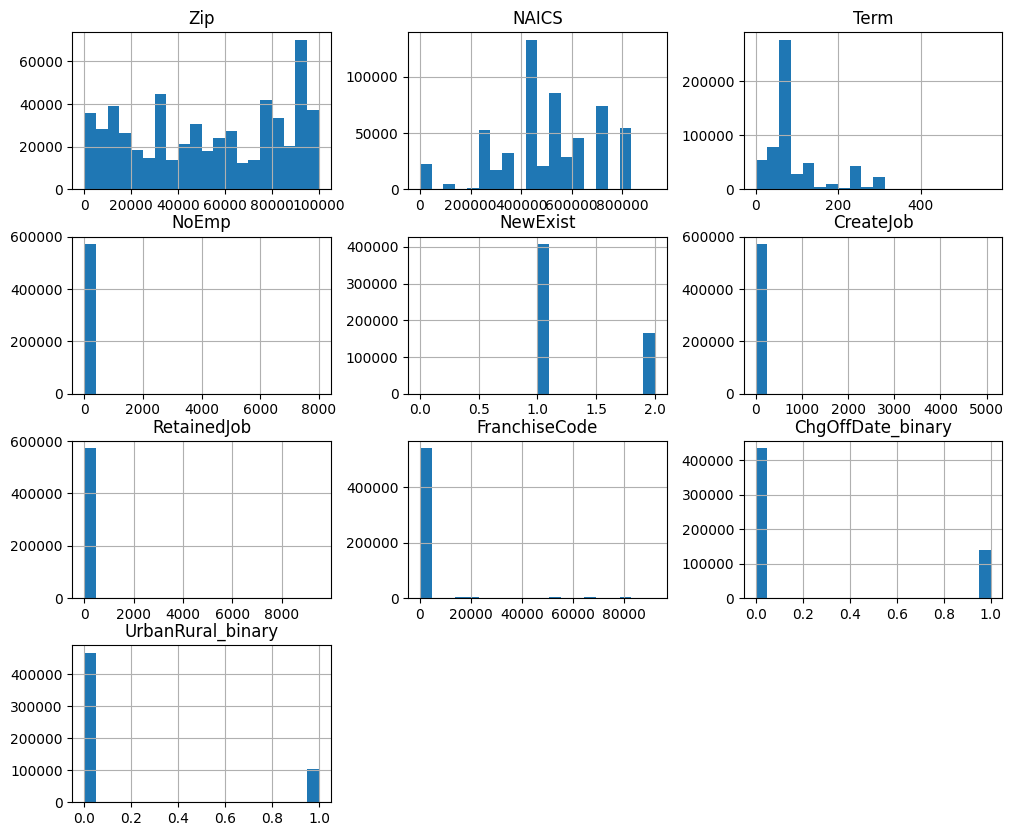

In [69]:
#create a histogram for bumeric variables with bins of 20 
df_clean.hist(figsize=(12, 10), bins=20)


ii. Historgram of Loan approval by year

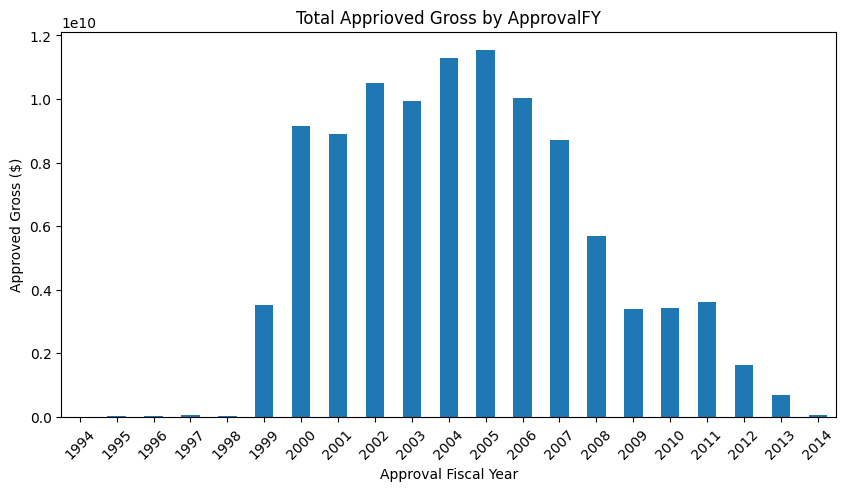

In [85]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

 # Ensure ApprovalFY is numeric
df_clean['ApprovalFY'] = pd.to_numeric(df_clean['ApprovalFY'], errors='coerce')

# Drop any NaN values that might have been introduced during conversion
df_clean = df_clean.dropna(subset=['ApprovalFY'])

# Aggregate and plot
df_clean.groupby('ApprovalFY')['GrAppv'].sum().plot(kind='bar', figsize=(10, 5))

plt.xlabel("Approval Fiscal Year")
plt.ylabel("Approved Gross ($)")
plt.title("Total Approved Gross by ApprovalFY")
plt.xticks(rotation=45)
plt.show()


The peak of loan approval was 2005

iii. Histogram of loan disbursement by year

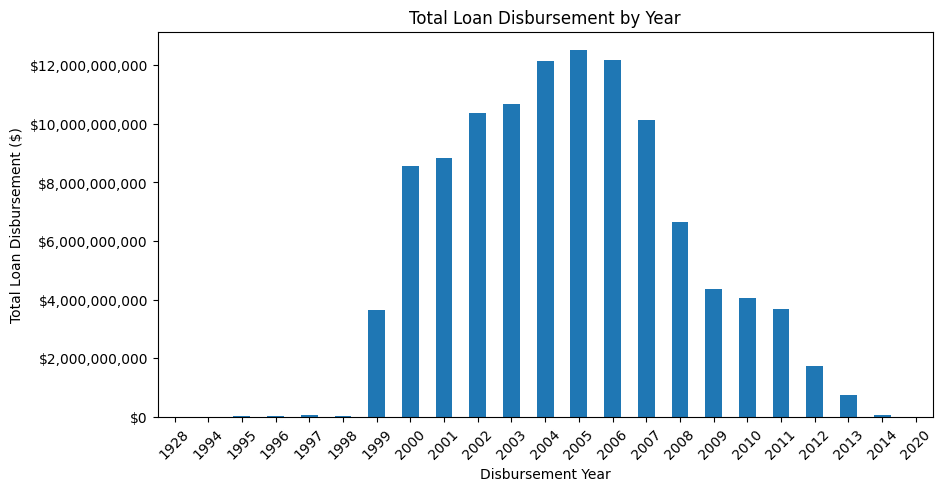

In [84]:

# Extract the last two digits (year) from DisbursementDate and convert to integer
df_clean['DisbursementYear'] = df_clean['DisbursementDate'].str[-2:].astype(int)

# Fix potential century issue: Convert 00-23 to 2000-2023, and 80-99 to 1980-1999
df_clean['DisbursementYear'] = df_clean['DisbursementYear'].apply(lambda x: x + 2000 if x < 24 else x + 1900)

# Aggregate total disbursement by year
yearly_disbursement = df_clean.groupby('DisbursementYear')['DisbursementGross'].sum()

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
yearly_disbursement.plot(kind='bar', ax=ax)

# Formatting
ax.set_xlabel("Disbursement Year")
ax.set_ylabel("Total Loan Disbursement ($)")
ax.set_title("Total Loan Disbursement by Year")
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))  # Format as dollars
plt.xticks(rotation=45)

plt.show()

The peak of loan disbursement year was 2005 matching the year that had the highest loan approval 

Box plots for outliers and distributions 

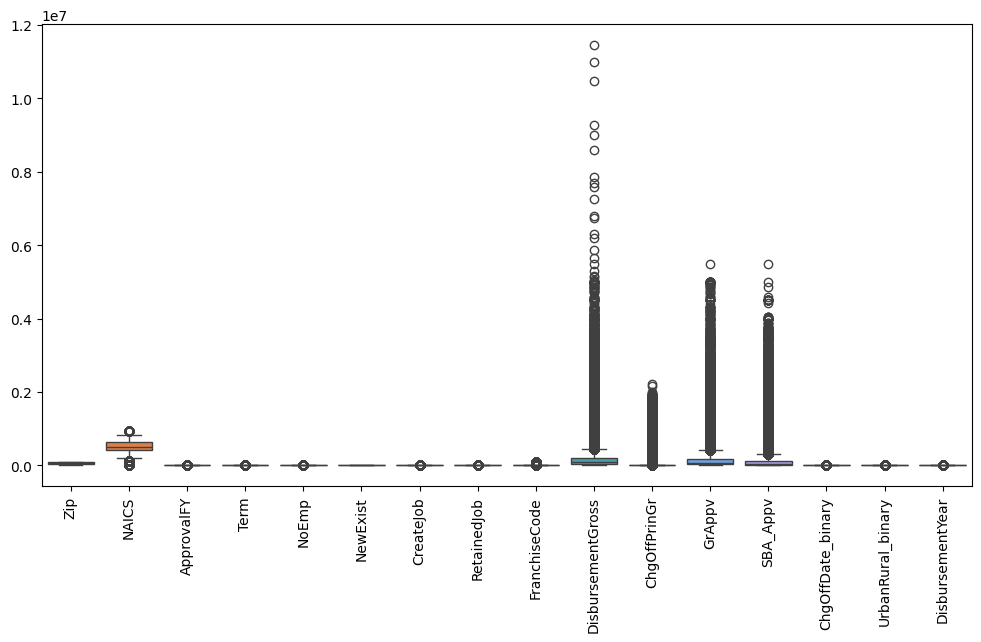

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.show()


Disbursement gross has a six outliers, GrAppc and SBA_appv only have 1 each